### 1. Read Json File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and read the JSON file to extract new parameters
import json

# Path to the JSON file with new parameters
json_path = 'fiji.json'

# Read the JSON file
with open(json_path, 'r') as file:
    df = json.load(file)

# Display the loaded parameters to confirm
df

{'Tmax': 60,
 'D': 26,
 'L': 1,
 'ls': 1,
 'le': 60,
 'α': 0.6,
 'β': 0.2,
 'γ': 0.3,
 'reduction_factor': 0.0,
 'Connectivity Matrix W': {'Outside World-FP,Suva-FP': 3000,
  'Outside World-AP,Nadi-AP': 4500,
  'Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP': 294,
  'Denarau-FP,Bounty Island-FP': 90,
  'Denarau-FP,Tokoriki Island-FP': 45,
  'Denarau-FP,Group 2 (Tadrai/Mana)-FP': 120,
  'Denarau-FP,Group 3 (Treasure/Beachconber)-FP': 60,
  'Denarau-FP,Matamanoa Island-FP': 22,
  'Natovi Jetty-FP,Nabouwalu-FP': 1200,
  'Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP': 361,
  'Lautoka-FP,Coralview Island-FP': 333,
  'Lautoka-FP,Octopus Resort-FP': 75,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP': 50,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Group 2 (Tadrai/Mana)-FP': 80,
  'Bounty Island-FP,Group 2 (Tadrai/Mana)-FP': 70,
  'Bounty Island-FP,Group 3 (Treasure/Beachconber)-FP': 50,
  'Suva-FP,Kadavu-FP': 1630,
  'Group 1 (Paradise/MantaRay/Barefo

In [2]:
connection = df['Connectivity Matrix W'].copy()
connection

{'Outside World-FP,Suva-FP': 3000,
 'Outside World-AP,Nadi-AP': 4500,
 'Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP': 294,
 'Denarau-FP,Bounty Island-FP': 90,
 'Denarau-FP,Tokoriki Island-FP': 45,
 'Denarau-FP,Group 2 (Tadrai/Mana)-FP': 120,
 'Denarau-FP,Group 3 (Treasure/Beachconber)-FP': 60,
 'Denarau-FP,Matamanoa Island-FP': 22,
 'Natovi Jetty-FP,Nabouwalu-FP': 1200,
 'Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP': 361,
 'Lautoka-FP,Coralview Island-FP': 333,
 'Lautoka-FP,Octopus Resort-FP': 75,
 'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP': 50,
 'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Group 2 (Tadrai/Mana)-FP': 80,
 'Bounty Island-FP,Group 2 (Tadrai/Mana)-FP': 70,
 'Bounty Island-FP,Group 3 (Treasure/Beachconber)-FP': 50,
 'Suva-FP,Kadavu-FP': 1630,
 'Group 1 (Paradise/MantaRay/Barefoot)-FP,Group 3 (Treasure/Beachconber)-FP': 60,
 'Group 1 (Paradise/MantaRay/Barefoot)-FP,Octopus Resort-FP': 30,
 'Tokoriki Island-FP,Group 3 (Treasure/Bea

In [3]:
community = df['ports_according_communities'].copy()


In [4]:
n = df['n'].copy()
outside_world = {'Outside World': n.pop('Outside World')}
sorted_data = {k: n[k] for k in sorted(n)}
population = {**outside_world, **sorted_data}
population

{'Outside World': 636000,
 'Bua/Macuata/Cakaudrove': 124994,
 'Cicia': 1028,
 'Kadavu': 10869,
 'Koro': 2937,
 'Lakeba': 1557,
 'LomaivitiOtherIslands': 230,
 'Lomaloma/Mualevu': 1753,
 'Malolo(Matamanoa Island)': 150,
 'Malolo(Tadrai/Mana)': 800,
 'Malolo(Tokoriki Island)': 300,
 'Malolo(Tropica/Malolo/Likuliku/Castaway)': 1961,
 'Moala': 1383,
 'Nadi': 59717,
 'Naviti': 500,
 'Naviti(Paradise/MantaRay/Barefoot)': 2410,
 'Ovalau': 9606,
 'Sawakasa': 53614,
 'Serua': 16366,
 'Suva': 94088,
 'Tavuki': 4033,
 'Vuda(Bounty Island)': 600,
 'Vuda(Lautoka)': 98264,
 'Vuda(Treasure/Beachconber)': 400,
 'Wainikeli': 4486,
 'Yasawa': 2226}

### 2. Construct simulation locations and connections

In [5]:
def connections_to_locations(community, connection):
    port_to_location = {}
    for location, ports in community.items():
        for port in ports:
            port_to_location[port] = location

    location_connections = {}

    for key, value in connection.items():
        port1, port2 = key.split(',')
        loc1 = port_to_location.get(port1.strip(), None)
        loc2 = port_to_location.get(port2.strip(), None)


        if loc1 and loc2:
            sorted_locs = tuple(sorted([loc1, loc2]))

            if sorted_locs in location_connections:
                location_connections[sorted_locs] += value
            else:
                location_connections[sorted_locs] = value
    formatted_connections = {}
    for locations, flow in location_connections.items():
        loc1, loc2 = locations
        formatted_connections[f'{loc1},{loc2}'] = flow

    return formatted_connections

connection = connections_to_locations(community, connection)

connection

{'Outside World,Suva': 3000,
 'Nadi,Outside World': 4500,
 'Malolo(Tropica/Malolo/Likuliku/Castaway),Nadi': 494,
 'Nadi,Vuda(Bounty Island)': 90,
 'Malolo(Tokoriki Island),Nadi': 45,
 'Malolo(Tadrai/Mana),Nadi': 120,
 'Nadi,Vuda(Treasure/Beachconber)': 60,
 'Malolo(Matamanoa Island),Nadi': 22,
 'Bua/Macuata/Cakaudrove,Sawakasa': 1200,
 'Naviti(Paradise/MantaRay/Barefoot),Vuda(Lautoka)': 361,
 'Vuda(Lautoka),Yasawa': 333,
 'Naviti,Vuda(Lautoka)': 75,
 'Malolo(Tropica/Malolo/Likuliku/Castaway),Vuda(Bounty Island)': 50,
 'Malolo(Tadrai/Mana),Malolo(Tropica/Malolo/Likuliku/Castaway)': 80,
 'Malolo(Tadrai/Mana),Vuda(Bounty Island)': 70,
 'Vuda(Bounty Island),Vuda(Treasure/Beachconber)': 50,
 'Kadavu,Suva': 1630,
 'Naviti(Paradise/MantaRay/Barefoot),Vuda(Treasure/Beachconber)': 60,
 'Naviti,Naviti(Paradise/MantaRay/Barefoot)': 30,
 'Malolo(Tokoriki Island),Vuda(Treasure/Beachconber)': 40,
 'Malolo(Matamanoa Island),Malolo(Tokoriki Island)': 20,
 'Malolo(Tadrai/Mana),Vuda(Treasure/Beachconber

In [6]:
community = population.copy()

### 3. Create Connectivity Matrix W

In [7]:
def connection_matrix(connection,community):
    """
    Creates two matrices from a dictionary of connections between communities. One matrix is binary (indicating presence
    or absence of a connection), and the other matrix records the volume of each connection.

    Args:
        connection (dict): A dictionary where keys are strings formatted as "Departure,Arrival" and values are 
                           integers representing the volume of the connection between the communities.
        community (dict): A dictionary of communities where keys are community names and values are the population
                          or other relevant attributes (although these values are not used in this function).

    Returns:
        tuple: A tuple containing two DataFrames:
               1. A binary connection matrix (pandas DataFrame) where each cell [i, j] is 1 if there is a connection
                  between community i and community j, and 0 otherwise.
               2. A volume connection matrix (pandas DataFrame) where each cell [i, j] contains the volume of the 
                  connection between community i and community j if one exists, otherwise 0.
    """
    # Extract unique community names as locations
    locations = list(community.keys())
    
    # Create a zero-initialized square matrix
    matrix_zero = np.zeros((len(locations), len(locations)), dtype=int)
    
    matrix_binary = pd.DataFrame(matrix_zero.copy(), index=locations, columns=locations)
    matrix_volume = pd.DataFrame(matrix_zero.copy(), index=locations, columns=locations)
    
    # Update the matrix based on connections
    for con, vol in connection.items():
        dep, ari = con.split(',')
        if dep in locations and ari in locations:
            # Set the connection to 1
            matrix_binary.loc[dep, ari] = 1
            matrix_binary.loc[ari, dep] = 1 # Bidirectional connection
            # Set the connection to volumn
            matrix_volume.loc[dep, ari] = vol
            matrix_volume.loc[ari, dep] = vol # Bidirectional connection
    
            
    return matrix_binary,matrix_volume


In [8]:
binary_matrix,volume_matrix = connection_matrix(connection,community)
    
binary_matrix

,Outside World,Bua/Macuata/Cakaudrove,Cicia,Kadavu,Koro,Lakeba,LomaivitiOtherIslands,Lomaloma/Mualevu,Malolo(Matamanoa Island),Malolo(Tadrai/Mana),...,Ovalau,Sawakasa,Serua,Suva,Tavuki,Vuda(Bounty Island),Vuda(Lautoka),Vuda(Treasure/Beachconber),Wainikeli,Yasawa
Outside World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Bua/Macuata/Cakaudrove,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
Cicia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Kadavu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Koro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Lakeba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
LomaivitiOtherIslands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Lomaloma/Mualevu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Malolo(Matamanoa Island),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Malolo(Tadrai/Mana),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [9]:
volume_matrix

,Outside World,Bua/Macuata/Cakaudrove,Cicia,Kadavu,Koro,Lakeba,LomaivitiOtherIslands,Lomaloma/Mualevu,Malolo(Matamanoa Island),Malolo(Tadrai/Mana),...,Ovalau,Sawakasa,Serua,Suva,Tavuki,Vuda(Bounty Island),Vuda(Lautoka),Vuda(Treasure/Beachconber),Wainikeli,Yasawa
Outside World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3000,0,0,0,0,0,0
Bua/Macuata/Cakaudrove,0,0,0,0,0,0,0,0,0,0,...,0,1200,2145,4500,0,0,0,0,0,0
Cicia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,100,0,0,0,0,0,0
Kadavu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1630,0,0,0,0,0,0
Koro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,200,0,0,0,0,0,0
Lakeba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,160,0,0,0,0,0,0
LomaivitiOtherIslands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0
Lomaloma/Mualevu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,140,0,0,0,0,0,0
Malolo(Matamanoa Island),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,30,0,0
Malolo(Tadrai/Mana),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,70,0,25,0,0


### 4. Set up Outside World and Locations Initional SEIR statement

In [10]:

def seir_statement(day, community_seir): # inbound,
    """
    Updates or initializes the SEIR model states for a community with additional inbound effects.

    Args:
        day (int): Current simulation day. If day == 1, initialize the SEIR model.
        inbound (list): A list containing the minimum and maximum expected inbound individuals,
                        and the exposure rate among them.
        community (dict): A dictionary of communities with their initial populations.
        expose_rate (float): The rate at which inbound individuals are exposed to the disease.

    Returns:
        pd.DataFrame: A DataFrame containing updated SEIR values and ratios for each community.
    """
    
    # Initialize or copy the community DataFrame
    
    
    if day == 1:
        # Initial locations and population
        community_seir['Outside World'] = 0
        community_seir = pd.DataFrame(list(community_seir.values()), index=community_seir.keys(), columns=['Population'])
        # Initialize SEIR columns
        community_seir['S'] = community_seir['Population']
        community_seir['E'] = 0
        community_seir['I'] = 0
        community_seir['R'] = 0
    
    else:
        # Assume community_seir is already a DataFrame
        community_seir = community_seir.copy()
        
    # # Random inbound population between the specified bounds
    # P = np.random.randint(inbound[0], inbound[1] + 1)
    # E = int(P * inbound[2])  # Exposed individuals among inbound
    # S = P - E                # Susceptible individuals among inbound
    # I, R = 0, 0              # Initially, no infected or recovered in inbound

    # Update the 'Outside World' inbound directly in the DataFrame
        
    community_seir.loc['Outside World', 'Population'] = 0
    community_seir.loc['Outside World', 'S'] = 0
    community_seir.loc['Outside World', 'E'] = 0
    community_seir.loc['Outside World', 'I'] = 0
    community_seir.loc['Outside World', 'R'] = 0

    # Calculate the population ratios of S, E, I, and R
    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    

    return community_seir


In [11]:
#seir_statement_record = {}
community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1
day=1
community_seir = seir_statement(day, community_seir)
#seir_statement_record[day] = community_seir
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,0,0,0,0,0,NaN,NaN,NaN,NaN
Bua/Macuata/Cakaudrove,124994,124994,0,0,0,1.0,0.0,0.0,0.0
Cicia,1028,1028,0,0,0,1.0,0.0,0.0,0.0
Kadavu,10869,10869,0,0,0,1.0,0.0,0.0,0.0
Koro,2937,2937,0,0,0,1.0,0.0,0.0,0.0
Lakeba,1557,1557,0,0,0,1.0,0.0,0.0,0.0
LomaivitiOtherIslands,230,230,0,0,0,1.0,0.0,0.0,0.0
Lomaloma/Mualevu,1753,1753,0,0,0,1.0,0.0,0.0,0.0
Malolo(Matamanoa Island),150,150,0,0,0,1.0,0.0,0.0,0.0
Malolo(Tadrai/Mana),800,800,0,0,0,1.0,0.0,0.0,0.0


### 5. Migration between locations

In [12]:
def migration(community_seir, binary_matrix, volume_matrix, inbound):
    communities = community_seir.index
    migration_df = pd.DataFrame(0, index=communities, columns=['S_out', 'E_out', 'I_out', 'R_out', 'S_in', 'E_in', 'I_in', 'R_in'])

    for source in communities:
        for target in communities:
            if source != target and binary_matrix.loc[source, target] == 1:
                if source == 'Outside World':
                    # Random inbound population between the specified bounds
                    P = np.random.randint(inbound[0], inbound[1] + 1)
                    E = int(P * inbound[2])
                    S = P - E
                    I, R = 0, 0
                    max_migrants = P

                    # Ensure we do not exceed the available population in "Outside World"
                    max_migrants = min(max_migrants, community_seir.loc['Outside World', ['S', 'E', 'I', 'R']].sum())
                    selected_counts = pd.Series({'S': S, 'E': E, 'I': I, 'R': R})

                    for seir_type in ['S', 'E', 'I', 'R']:
                        migrants_count = selected_counts.get(seir_type, 0)
                        migration_df.loc[source, seir_type + '_out'] += migrants_count
                        migration_df.loc[target, seir_type + '_in'] += migrants_count
                        community_seir.loc[source, seir_type] -= migrants_count
                        community_seir.loc[target, seir_type] += migrants_count

                    # Randomly select SEIR individuals to return to "Outside World"
                    total_migrants_back = sum(selected_counts.values)
                    available_seir = community_seir.loc[target, ['S', 'E', 'I', 'R']].clip(lower=0)
                    repeats = available_seir.astype(int).values
                    population_indices = np.repeat(['S', 'E', 'I', 'R'], repeats)

                    if total_migrants_back > len(population_indices):
                        total_migrants_back = len(population_indices)

                    selected_indices = np.random.choice(population_indices, size=total_migrants_back, replace=False)
                    selected_counts_back = pd.Series(selected_indices).value_counts()

                    for seir_type in ['S', 'E', 'I', 'R']:
                        migrants_count = selected_counts_back.get(seir_type, 0)
                        migration_df.loc[target, seir_type + '_out'] += migrants_count
                        migration_df.loc[source, seir_type + '_in'] += migrants_count
                        community_seir.loc[target, seir_type] -= migrants_count
                        community_seir.loc[source, seir_type] += migrants_count

                elif target == 'Outside World':
                    # No need to handle separately as it's symmetric to above

                    pass
                else:
                    max_migrants = int(volume_matrix.loc[source, target] * 0.8)
                    available_seir = community_seir.loc[source, ['S', 'E', 'I', 'R']].clip(lower=0)
                    total_available = available_seir.sum()
                    
                    if total_available > 0 and max_migrants > 0:
                        max_migrants = min(int(max_migrants), int(total_available))
                        
                        repeats = available_seir.astype(int).values
                        population_indices = np.repeat(['S', 'E', 'I', 'R'], repeats)
                        
                        if max_migrants > len(population_indices):
                            max_migrants = len(population_indices)
                        selected_indices = np.random.choice(population_indices, size=max_migrants, replace=False)
                        
                        selected_counts = pd.Series(selected_indices).value_counts()
                        
                        for seir_type in ['S', 'E', 'I', 'R']:
                            migrants_count = selected_counts.get(seir_type, 0)
                            migration_df.loc[source, seir_type + '_out'] += migrants_count
                            migration_df.loc[target, seir_type + '_in'] += migrants_count
                            community_seir.loc[source, seir_type] -= migrants_count
                            community_seir.loc[target, seir_type] += migrants_count

    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    
    return community_seir, migration_df

# Apply the updated migration function
community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)

print(migration_df)


                                          S_out  E_out  I_out  R_out   S_in  \
Outside World                               574     63      0      0    636   
Bua/Macuata/Cakaudrove                    12276      0      0      0  12275   
Cicia                                        80      0      0      0     80   
Kadavu                                     1304      0      0      0   1304   
Koro                                        160      0      0      0    160   
Lakeba                                      128      0      0      0    128   
LomaivitiOtherIslands                        27      0      0      0     27   
Lomaloma/Mualevu                            112      0      0      0    111   
Malolo(Matamanoa Island)                     57      0      0      0     57   
Malolo(Tadrai/Mana)                         236      0      0      0    236   
Malolo(Tokoriki Island)                      84      0      0      0     84   
Malolo(Tropica/Malolo/Likuliku/Castaway)    499     

In [13]:
migration_df

,S_out,E_out,I_out,R_out,S_in,E_in,I_in,R_in
Outside World,574,63,0,0,636,1,0,0
Bua/Macuata/Cakaudrove,12276,0,0,0,12275,1,0,0
Cicia,80,0,0,0,80,0,0,0
Kadavu,1304,0,0,0,1304,0,0,0
Koro,160,0,0,0,160,0,0,0
Lakeba,128,0,0,0,128,0,0,0
LomaivitiOtherIslands,27,0,0,0,27,0,0,0
Lomaloma/Mualevu,112,0,0,0,111,1,0,0
Malolo(Matamanoa Island),57,0,0,0,57,0,0,0
Malolo(Tadrai/Mana),236,0,0,0,236,0,0,0


In [14]:
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,0,62,-62,0,0,inf,-inf,NaN,NaN
Bua/Macuata/Cakaudrove,124994,124993,1,0,0,0.999992,0.000008,0.0,0.0
Cicia,1028,1028,0,0,0,1.000000,0.000000,0.0,0.0
Kadavu,10869,10869,0,0,0,1.000000,0.000000,0.0,0.0
Koro,2937,2937,0,0,0,1.000000,0.000000,0.0,0.0
Lakeba,1557,1557,0,0,0,1.000000,0.000000,0.0,0.0
LomaivitiOtherIslands,230,230,0,0,0,1.000000,0.000000,0.0,0.0
Lomaloma/Mualevu,1753,1752,1,0,0,0.999430,0.000570,0.0,0.0
Malolo(Matamanoa Island),150,150,0,0,0,1.000000,0.000000,0.0,0.0
Malolo(Tadrai/Mana),800,800,0,0,0,1.000000,0.000000,0.0,0.0


In [15]:
migration_df

,S_out,E_out,I_out,R_out,S_in,E_in,I_in,R_in
Outside World,574,63,0,0,636,1,0,0
Bua/Macuata/Cakaudrove,12276,0,0,0,12275,1,0,0
Cicia,80,0,0,0,80,0,0,0
Kadavu,1304,0,0,0,1304,0,0,0
Koro,160,0,0,0,160,0,0,0
Lakeba,128,0,0,0,128,0,0,0
LomaivitiOtherIslands,27,0,0,0,27,0,0,0
Lomaloma/Mualevu,112,0,0,0,111,1,0,0
Malolo(Matamanoa Island),57,0,0,0,57,0,0,0
Malolo(Tadrai/Mana),236,0,0,0,236,0,0,0


### 6. Infection inside locations

In [16]:
def infection(α, β, γ, community_seir):
    """
    Simulate the infection process within each community based on the SEIR model.

    Args:
        α (float): Transmission rate, the probability of susceptible individuals becoming exposed.
        β (float): Recovery rate, the probability of infected individuals recovering.
        γ (float): Progression rate, the probability of exposed individuals becoming infectious.
        community_seir (pd.DataFrame): A DataFrame containing the SEIR values for each community,
                                       indexed by community names with columns for 'S', 'E', 'I', 'R' and their ratios.

    Returns:
        pd.DataFrame: Updated DataFrame after applying the infection dynamics to each community.
    """
    # Create a copy to update the community SEIR values without altering the original during iteration
    updated_seir = community_seir.copy()
    
    for index, row in updated_seir.iterrows():
        if index != 'Outside World':  # Skip "Outside World"
            n = row['S'] + row['E'] + row['I'] + row['R']
            if n > 0:
                S, E, I, R = row['S'], row['E'], row['I'], row['R']
                δ_SE = np.random.binomial(S, α * I / n if I > 0 else 0)  # Susceptible to Exposed
                δ_EI = np.random.binomial(E, γ)  # Exposed to Infected
                δ_IR = np.random.binomial(I, β)  # Infected to Recovered
                
                # Update the SEIR counts
                updated_seir.at[index, 'S'] = S - δ_SE
                updated_seir.at[index, 'E'] = E + δ_SE - δ_EI
                updated_seir.at[index, 'I'] = I + δ_EI - δ_IR
                updated_seir.at[index, 'R'] = R + δ_IR

                # Update the ratios
                #total_pop = updated_seir.at[index, 'S'] + updated_seir.at[index, 'E'] + updated_seir.at[index, 'I'] + updated_seir.at[index, 'R']
                updated_seir.at[index, 'S_ratio'] = updated_seir.at[index, 'S'] / updated_seir.at[index, 'Population']
                updated_seir.at[index, 'E_ratio'] = updated_seir.at[index, 'E'] / updated_seir.at[index, 'Population']
                updated_seir.at[index, 'I_ratio'] = updated_seir.at[index, 'I'] / updated_seir.at[index, 'Population']
                updated_seir.at[index, 'R_ratio'] = updated_seir.at[index, 'R'] / updated_seir.at[index, 'Population']
    
    return updated_seir,δ_EI

# Example parameters for the infection function
α = 0.6
β = 0.2
γ = 0.3

# Running the migration function
community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)

# Running the infection function
community_seir, new_cases= infection(α, β, γ, community_seir)

print(community_seir)
print(migration_df)


                                          Population       S    E   I  R  \
Outside World                                      0     119 -119   0  0   
Bua/Macuata/Cakaudrove                        124994  124984    6   4  0   
Cicia                                           1028    1028    0   0  0   
Kadavu                                         10869   10869    0   0  0   
Koro                                            2937    2937    0   0  0   
Lakeba                                          1557    1557    0   0  0   
LomaivitiOtherIslands                            230     230    0   0  0   
Lomaloma/Mualevu                                1753    1752    1   0  0   
Malolo(Matamanoa Island)                         150     150    0   0  0   
Malolo(Tadrai/Mana)                              800     800    0   0  0   
Malolo(Tokoriki Island)                          300     300    0   0  0   
Malolo(Tropica/Malolo/Likuliku/Castaway)        1961    1959    1   1  0   
Moala       

In [17]:
α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

x_updated, new_cases = infection(α, β, γ, community_seir)
x_updated,new_cases


(                                          Population       S    E   I  R  \
 Outside World                                      0     119 -119   0  0   
 Bua/Macuata/Cakaudrove                        124994  124984    3   4  3   
 Cicia                                           1028    1028    0   0  0   
 Kadavu                                         10869   10869    0   0  0   
 Koro                                            2937    2937    0   0  0   
 Lakeba                                          1557    1557    0   0  0   
 LomaivitiOtherIslands                            230     230    0   0  0   
 Lomaloma/Mualevu                                1753    1752    1   0  0   
 Malolo(Matamanoa Island)                         150     150    0   0  0   
 Malolo(Tadrai/Mana)                              800     800    0   0  0   
 Malolo(Tokoriki Island)                          300     300    0   0  0   
 Malolo(Tropica/Malolo/Likuliku/Castaway)        1961    1959    1   1  0   

In [18]:
def lockdown(location, binary_matrix):
    if location in binary_matrix.index:
        location.value ==0
    else:
        print("Location missing")    

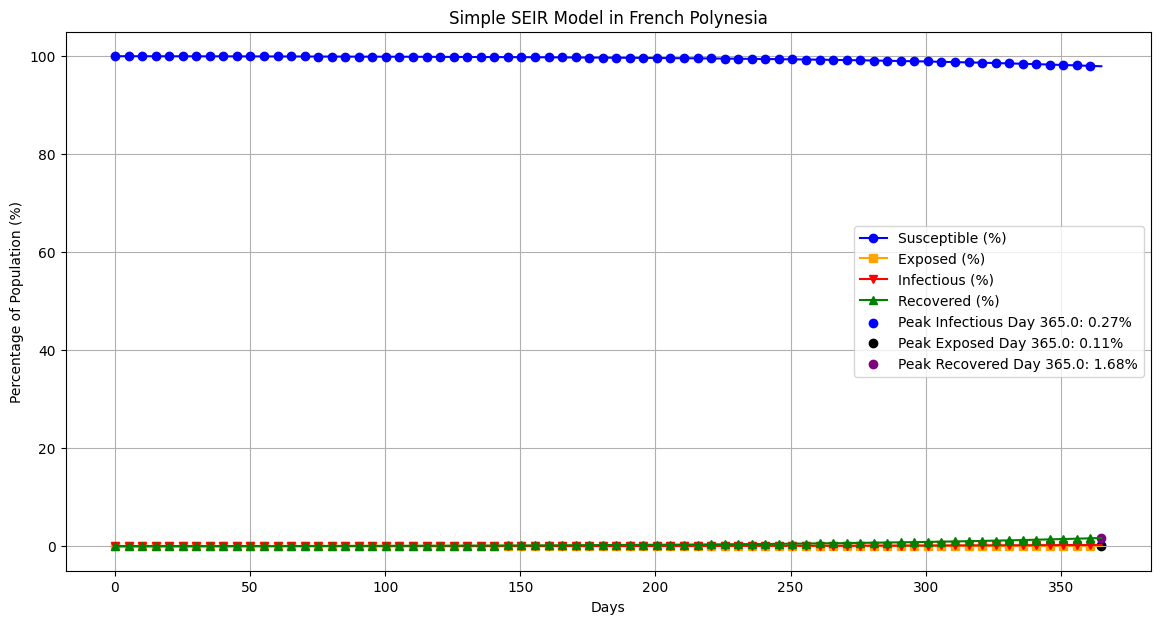

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# SEIR model parameters
alpha = 0.077  # Transmission rate
beta = 0.0625   # Recovery rate
gamma = 0.167  # Progression rate
days = 365
population = 929766  # Fiji population size

# Initial states
S0 = int(0.9999 * population)
E0 = int(0.0001 * population)
I0 = int(0.00001 * population)
R0 = 0
initial_state = [S0, E0, I0, R0]

# SEIR model differential equations
def seir(y, t, alpha, beta, gamma, population):
    S, E, I, R = y
    dS_dt = -alpha * S * I / population
    dE_dt = alpha * S * I / population - gamma * E
    dI_dt = gamma * E - beta * I
    dR_dt = beta * I
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Time grid
time = np.linspace(0, days, days)

# Solve the SEIR equations using odeint
solution = odeint(seir, initial_state, time, args=(alpha, beta, gamma, population))
S, E, I, R = solution.T

# Convert populations to percentages of the total population
S_percent = (S / population) * 100
E_percent = (E / population) * 100
I_percent = (I / population) * 100
R_percent = (R / population) * 100

# Identify key points
max_I_idx = np.argmax(I)
max_E_idx = np.argmax(E)
max_R_idx = np.argmax(R)

# Combine data for better visualization
seir_history = {
    day: pd.DataFrame({'S': [S[day]], 'E': [E[day]], 'I': [I[day]], 'R': [R[day]]})
    for day in range(days)
}

# Check if there are any points where S_percent < 10 or S_percent <= 5
if np.any(S_percent < 10):
    first_digit_zero_S_idx = np.where(S_percent < 10)[0][0]
else:
    first_digit_zero_S_idx = None

if np.any(S_percent <= 5):
    first_five_percent_S_idx = np.where(S_percent <= 5)[0][0]
else:
    first_five_percent_S_idx = None

# Plot with key points
plt.figure(figsize=(14, 7))
plt.plot(time, S_percent, label="Susceptible (%)", color='blue', marker='o', linestyle='-', markevery=5)
plt.plot(time, E_percent, label="Exposed (%)", color='orange', marker='s', linestyle='-', markevery=5)
plt.plot(time, I_percent, label="Infectious (%)", color='red', marker='v', linestyle='-', markevery=5)
plt.plot(time, R_percent, label="Recovered (%)", color='green', marker='^', linestyle='-', markevery=5)

# Plot key points only if they exist
if first_digit_zero_S_idx is not None:
    plt.scatter(time[first_digit_zero_S_idx], S_percent[first_digit_zero_S_idx], color='pink', label=f'First <10% Susceptible Day {time[first_digit_zero_S_idx]}: {S_percent[first_digit_zero_S_idx]:.2f}%')
if first_five_percent_S_idx is not None:
    plt.scatter(time[first_five_percent_S_idx], S_percent[first_five_percent_S_idx], color='cyan', label=f'First ≤5% Susceptible Day {time[first_five_percent_S_idx]}: {S_percent[first_five_percent_S_idx]:.2f}%')

plt.scatter(time[max_I_idx], I_percent[max_I_idx], color='blue', label=f'Peak Infectious Day {time[max_I_idx]}: {I_percent[max_I_idx]:.2f}%')
plt.scatter(time[max_E_idx], E_percent[max_E_idx], color='black', label=f'Peak Exposed Day {time[max_E_idx]}: {E_percent[max_E_idx]:.2f}%')
plt.scatter(time[max_R_idx], R_percent[max_R_idx], color='purple', label=f'Peak Recovered Day {time[max_R_idx]}: {R_percent[max_R_idx]:.2f}%')

plt.xlabel("Days")
plt.ylabel("Percentage of Population (%)")
plt.title("Simple SEIR Model in French Polynesia")
plt.legend()
plt.grid(True)
plt.show()

### 7. Simulation

In [36]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.0625  # Recovery rate
γ = 0.167  # Progression rate from exposed to infectious

no_measure = {}
daily_new_cases = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)

    community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    #print(migration_df)
    
    community_seir, new_cases = infection(α, β, γ, community_seir)
    no_measure[day] = community_seir
    daily_new_cases[day] = new_cases

    #print("Day", day, ":")
    #print(community_seir)

In [37]:
no_measure

{1:                                           Population       S   E  I  R  \
 Outside World                                      0      75 -75  0  0   
 Bua/Macuata/Cakaudrove                        124994  124985   8  1  0   
 Cicia                                           1028    1028   0  0  0   
 Kadavu                                         10869   10869   0  0  0   
 Koro                                            2937    2937   0  0  0   
 Lakeba                                          1557    1557   0  0  0   
 LomaivitiOtherIslands                            230     230   0  0  0   
 Lomaloma/Mualevu                                1753    1753   0  0  0   
 Malolo(Matamanoa Island)                         150     150   0  0  0   
 Malolo(Tadrai/Mana)                              800     800   0  0  0   
 Malolo(Tokoriki Island)                          300     300   0  0  0   
 Malolo(Tropica/Malolo/Likuliku/Castaway)        1961    1961   0  0  0   
 Moala                

In [22]:
daily_new_cases

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 1,
 13: 0,
 14: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 0,
 19: 1,
 20: 0,
 21: 1,
 22: 0,
 23: 0,
 24: 1,
 25: 0,
 26: 0,
 27: 0,
 28: 1,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 1,
 41: 0,
 42: 0,
 43: 1,
 44: 0,
 45: 1,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 1,
 52: 1,
 53: 0,
 54: 1,
 55: 1,
 56: 0,
 57: 2,
 58: 0,
 59: 1,
 60: 0,
 61: 1,
 62: 2,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 1,
 68: 0,
 69: 1,
 70: 0,
 71: 0,
 72: 0,
 73: 2,
 74: 0,
 75: 2,
 76: 0,
 77: 0,
 78: 2,
 79: 1,
 80: 0,
 81: 1,
 82: 0,
 83: 2,
 84: 0,
 85: 0,
 86: 1,
 87: 0,
 88: 3,
 89: 2,
 90: 1,
 91: 0,
 92: 1,
 93: 0,
 94: 4,
 95: 0,
 96: 1,
 97: 0,
 98: 0,
 99: 1,
 100: 0,
 101: 0,
 102: 1,
 103: 0,
 104: 0,
 105: 0,
 106: 1,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 2,
 112: 2,
 113: 2,
 114: 1,
 115: 1,
 116: 0,
 117: 0,
 118: 1,
 119: 3,
 120: 0,
 121: 0,
 122: 1,
 123: 2,
 

In [23]:
# 初始化累计新增病例数
cumulative_cases = 0

# 创建包含天数、每日新增病例和累计新增病例的字典列表
cases_data = []

for day, new_cases in daily_new_cases.items():
    cumulative_cases += new_cases
    cases_data.append({
        'Day': day,
        'New_Cases': new_cases,
        'Cumulative_Cases': cumulative_cases
    })

# 将字典列表转换为 JSON 格式并保存到文件中
with open('fj_cases_data.json', 'w') as json_file:
    json.dump(cases_data, json_file, indent=4)

In [24]:
def savefile(seir,name):
    all_days = []
    for day, df in seir.items():
        # filter 'Outside World'
        df_filtered = df.loc[df.index != 'Outside World'].copy()
        df_filtered['Day'] = day
        all_days.append(df_filtered.copy())
        
    full_data = pd.concat(all_days)
    national_seir = full_data.groupby('Day').sum()

    national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)
    # CSV
    output_path = f'{name}.csv'
    national_seir.to_csv(output_path)
    print(f'All data saved to {output_path}')

Remove the influence of “Outside World” because the number of inbound and outbound populations remains consistent.

In [25]:
savefile(seir_history,'fj_simple_seir')

All data saved to fj_simple_seir.csv


In [26]:
savefile(no_measure,'fj_no_measure')

All data saved to fj_no_measure.csv


In [27]:
def seir_plot(method_start, method_end, seir_history):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    national_seir = full_data.groupby('Day').sum()
    national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)

    for compartment in ['S', 'E', 'I', 'R']:
        national_seir[f'{compartment}_ratio'] = national_seir[compartment] / national_seir['Total']
        
    marker_every = 5
    
    colors = {
    'S': 'blue',   # Susceptible - Blue
    'E': 'orange', # Exposed - Orange
    'I': 'red',    # Infected - Red
    'R': 'green'   # Recovered - Green
    }

    plt.figure(figsize=(14, 7))
    # Plot with different markers for each compartment
    plt.plot(national_seir.index, national_seir['S_ratio'], label='S - Susceptible', marker='o', linestyle='-', markevery=marker_every, color=colors['S'])  # Circle markers
    plt.plot(national_seir.index, national_seir['E_ratio'], label='E - Exposed', marker='s', linestyle='-', markevery=marker_every, color=colors['E'])  # Square markers
    plt.plot(national_seir.index, national_seir['I_ratio'], label='I - Infected', marker='v', linestyle='-', markevery=marker_every, color=colors['I'])  # Triangle_down markers
    plt.plot(national_seir.index, national_seir['R_ratio'], label='R - Recovered', marker='^', linestyle='-', markevery=marker_every, color=colors['R'])  # Triangle_up markers

    # Highlight the intervention period
    plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

    # Identify key points
    max_I_idx = national_seir['I_ratio'].idxmax()
    max_E_idx = national_seir['E_ratio'].idxmax()
    max_R_idx = national_seir['R_ratio'].idxmax()
    
    if not national_seir[national_seir['S_ratio'] < 0.1].empty:
        first_digit_zero_S_idx = national_seir[national_seir['S_ratio'] < 0.1].index[0]
        plt.scatter(first_digit_zero_S_idx, national_seir.loc[first_digit_zero_S_idx, 'S_ratio'], color='pink', label=f'First <10% Susceptible Day {first_digit_zero_S_idx}: {national_seir.loc[first_digit_zero_S_idx, "S_ratio"]:.2%}')
    
    if not national_seir[national_seir['S_ratio'] <= 0.05].empty:
        first_five_percent_S_idx = national_seir[national_seir['S_ratio'] <= 0.05].index[0]
        plt.scatter(first_five_percent_S_idx, national_seir.loc[first_five_percent_S_idx, 'S_ratio'], color='cyan', label=f'First ≤5% Susceptible Day {first_five_percent_S_idx}: {national_seir.loc[first_five_percent_S_idx, "S_ratio"]:.2%}')

    # Add scatter plot for key points
    plt.scatter(max_I_idx, national_seir.loc[max_I_idx, 'I_ratio'], color='blue', label=f'Peak Infected Day {max_I_idx}: {national_seir.loc[max_I_idx, "I_ratio"]:.2%}')
    plt.scatter(max_E_idx, national_seir.loc[max_E_idx, 'E_ratio'], color='black', label=f'Peak Exposed Day {max_E_idx}: {national_seir.loc[max_E_idx, "E_ratio"]:.2%}')
    plt.scatter(max_R_idx, national_seir.loc[max_R_idx, 'R_ratio'], color='purple', label=f'Peak Recovered Day {max_R_idx}: {national_seir.loc[max_R_idx, "R_ratio"]:.2%}')

    plt.title('National Travel Network SEIR Ratios Over Time with Key Points')
    plt.xlabel('Day')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)  
    plt.legend()
    plt.grid(True)
    plt.show()

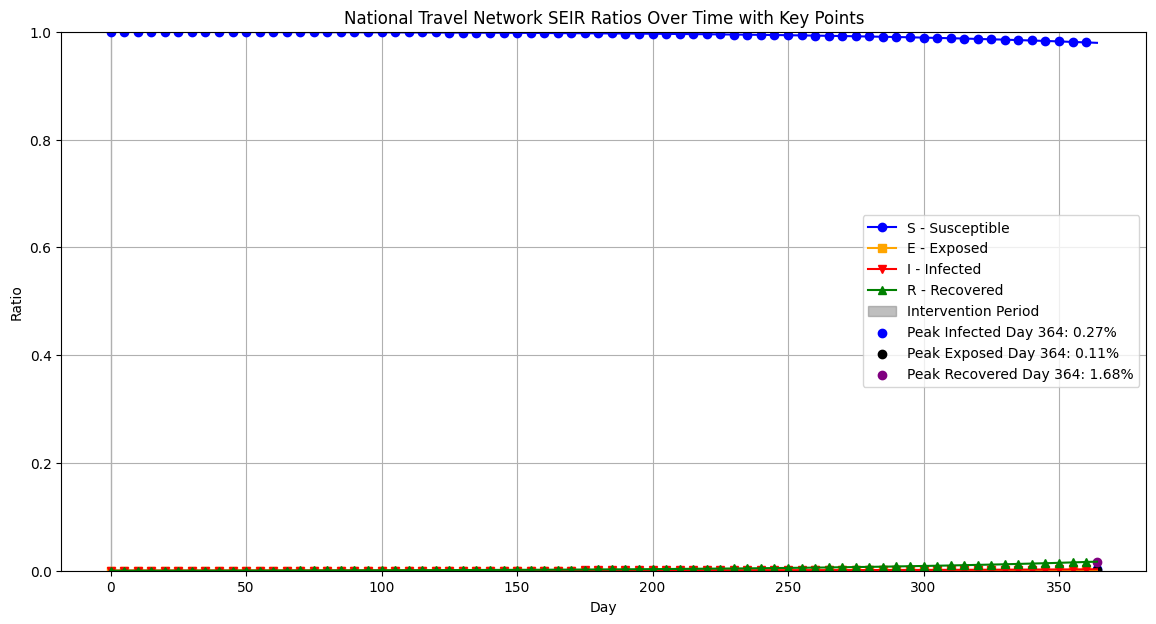

In [28]:
seir_plot(method_start=0, method_end=0, seir_history=seir_history)

In [29]:
def seir_plot_all_locations(method_start, method_end, seir_history):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    
    colors = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green'}
    markers = {'S': 'o', 'E': 's', 'I': 'v', 'R': '^'}
    marker_every = 5

    locations = full_data.index.get_level_values(0).unique()

    for location in locations:
        if location == "Outside World":
            continue
        location_data = full_data.loc[location]
        location_data['Total'] = location_data[['S', 'E', 'I', 'R']].sum(axis=1)
        for compartment in ['S', 'E', 'I', 'R']:
            location_data[f'{compartment}_ratio'] = location_data[compartment] / location_data['Total']

        plt.figure(figsize=(14, 7))
        for compartment in ['S_ratio', 'E_ratio', 'I_ratio', 'R_ratio']:
            plt.plot(location_data['Day'], location_data[compartment], label=f'{compartment[0]} - {compartment.split("_")[0]}', marker=markers[compartment[0]], linestyle='-', markevery=marker_every, color=colors[compartment[0]])

        # Highlight the intervention period
        plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

        # Identify key points
        max_I_idx = location_data['I_ratio'].idxmax()
        max_E_idx = location_data['E_ratio'].idxmax()
        max_R_idx = location_data['R_ratio'].idxmax()
        
        if not location_data[location_data['S_ratio'] < 0.1].empty:
            first_digit_zero_S_idx = location_data[location_data['S_ratio'] < 0.1].index[0]
            first_digit_zero_S_value = location_data.loc[first_digit_zero_S_idx, 'S_ratio'].iat[0]
            plt.scatter(first_digit_zero_S_idx, first_digit_zero_S_value, color='pink', label=f'First <10% Susceptible Day {first_digit_zero_S_idx}: {first_digit_zero_S_value:.2%}')
        
        if not location_data[location_data['S_ratio'] <= 0.05].empty:
            first_five_percent_S_idx = location_data[location_data['S_ratio'] <= 0.05].index[0]
            first_five_percent_S_value = location_data.loc[first_five_percent_S_idx, 'S_ratio'].iat[0]
            plt.scatter(first_five_percent_S_idx, first_five_percent_S_value, color='cyan', label=f'First ≤5% Susceptible Day {first_five_percent_S_idx}: {first_five_percent_S_value:.2%}')

        # Add scatter plot for key points
        max_I_value = location_data.loc[max_I_idx, 'I_ratio'].iat[0]
        max_E_value = location_data.loc[max_E_idx, 'E_ratio'].iat[0]
        max_R_value = location_data.loc[max_R_idx, 'R_ratio'].iat[0]
        plt.scatter(max_I_idx, max_I_value, color='blue', label=f'Peak Infected Day {max_I_idx}: {max_I_value:.2%}')
        plt.scatter(max_E_idx, max_E_value, color='black', label=f'Peak Exposed Day {max_E_idx}: {max_E_value:.2%}')
        plt.scatter(max_R_idx, max_R_value, color='purple', label=f'Peak Recovered Day {max_R_idx}: {max_R_value:.2%}')

        plt.title(f'SEIR Ratios Over Time for {location} with Key Points')
        plt.xlabel('Day')
        plt.ylabel('Ratio')
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.show()

In [30]:
#seir_plot_all_locations(method_start=10, method_end=100, seir_history=seir_history)

### 9. Lockdown Method

In [31]:
def temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=None):
    """
    Temporarily apply or lift lockdown measures based on the current simulation day, and restore matrices after lockdown ends.

    Args:
        day (int): Current simulation day.
        binary_matrix (pd.DataFrame): Binary connection matrix of communities.
        volume_matrix (pd.DataFrame): Volume matrix indicating the number of people that can migrate between communities.
        lockdown_communities (list): List of communities to lockdown.
        ls (int): Lockdown start day.
        le (int): Lockdown end day.
        method (str): 'binary' to cut connections, 'volume' to reduce traffic.
        reduction_factor (float): Factor by which to reduce the traffic, used only if method is 'volume'.
        original_matrices (dict): A dictionary containing original 'binary' and 'volume' matrices to restore after lockdown.

    Returns:
        tuple: Updated binary_matrix, volume_matrix
    """
    
    if ls <= day <= le:
        # Apply lockdown
        if method == 'binary':
            for community in lockdown_communities:
                for target in binary_matrix.columns:
                    if community != target:
                        binary_matrix.loc[community, target] = 0
                        binary_matrix.loc[target, community] = 0
        elif method == 'volume':
            for community in lockdown_communities:
                for target in volume_matrix.columns:
                    if community != target:
                        volume_matrix.loc[community, target] = int(volume_matrix.loc[community, target] * reduction_factor)
                        volume_matrix.loc[target, community] = int(volume_matrix.loc[target, community] * reduction_factor)
    elif day > le:
        # Restore original state after lockdown
        if original_matrices:
            binary_matrix.update(original_matrices['binary'])
            volume_matrix.update(original_matrices['volume'])

    return binary_matrix, volume_matrix


In [38]:
community

{'Outside World': 636000,
 'Bua/Macuata/Cakaudrove': 124994,
 'Cicia': 1028,
 'Kadavu': 10869,
 'Koro': 2937,
 'Lakeba': 1557,
 'LomaivitiOtherIslands': 230,
 'Lomaloma/Mualevu': 1753,
 'Malolo(Matamanoa Island)': 150,
 'Malolo(Tadrai/Mana)': 800,
 'Malolo(Tokoriki Island)': 300,
 'Malolo(Tropica/Malolo/Likuliku/Castaway)': 1961,
 'Moala': 1383,
 'Nadi': 59717,
 'Naviti': 500,
 'Naviti(Paradise/MantaRay/Barefoot)': 2410,
 'Ovalau': 9606,
 'Sawakasa': 53614,
 'Serua': 16366,
 'Suva': 94088,
 'Tavuki': 4033,
 'Vuda(Bounty Island)': 600,
 'Vuda(Lautoka)': 98264,
 'Vuda(Treasure/Beachconber)': 400,
 'Wainikeli': 4486,
 'Yasawa': 2226}

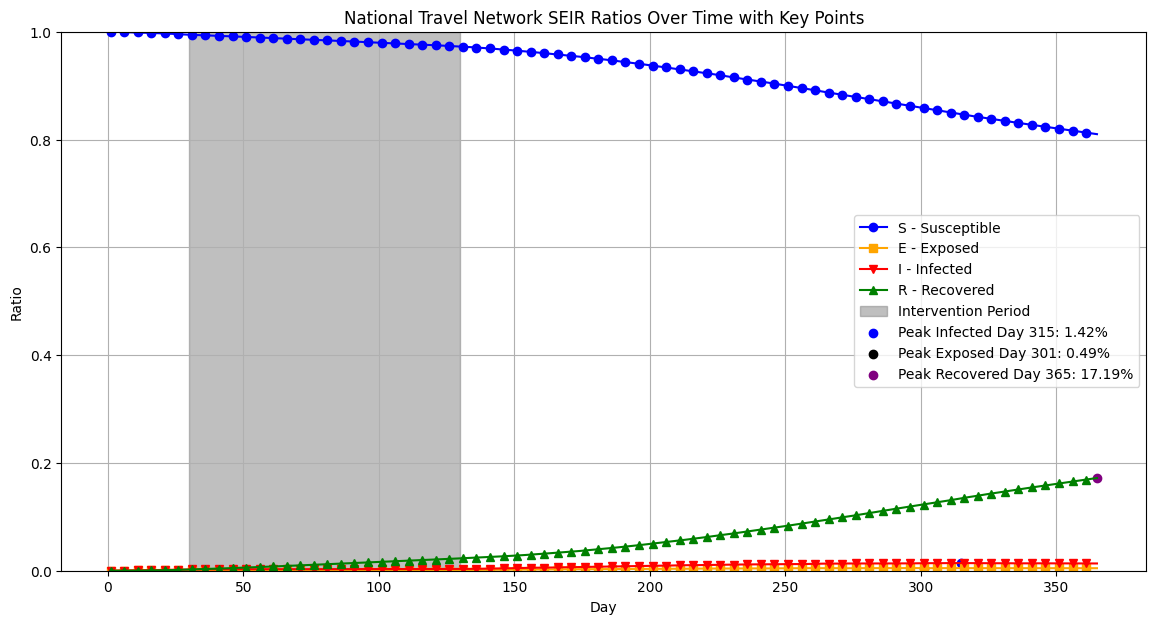

In [41]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.2  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day
lockdown_communities = ['Outside World'] # Lockdown location


lockdown_outsideworld = {}
daily_new_cases = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

for day in range(1, Tmax + 1):
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)

        community_seir = seir_statement(day,community_seir)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        #print(migration_df)
        community_seir, new_cases = infection(α, β, γ, community_seir)
        lockdown_outsideworld[day] = community_seir
        daily_new_cases[day] = new_cases
        

seir_plot(method_start=ls, method_end=le, seir_history=lockdown_outsideworld)

In [42]:
savefile(lockdown_outsideworld,'fj_lockdown_outsideworld')

All data saved to fj_lockdown_outsideworld.csv


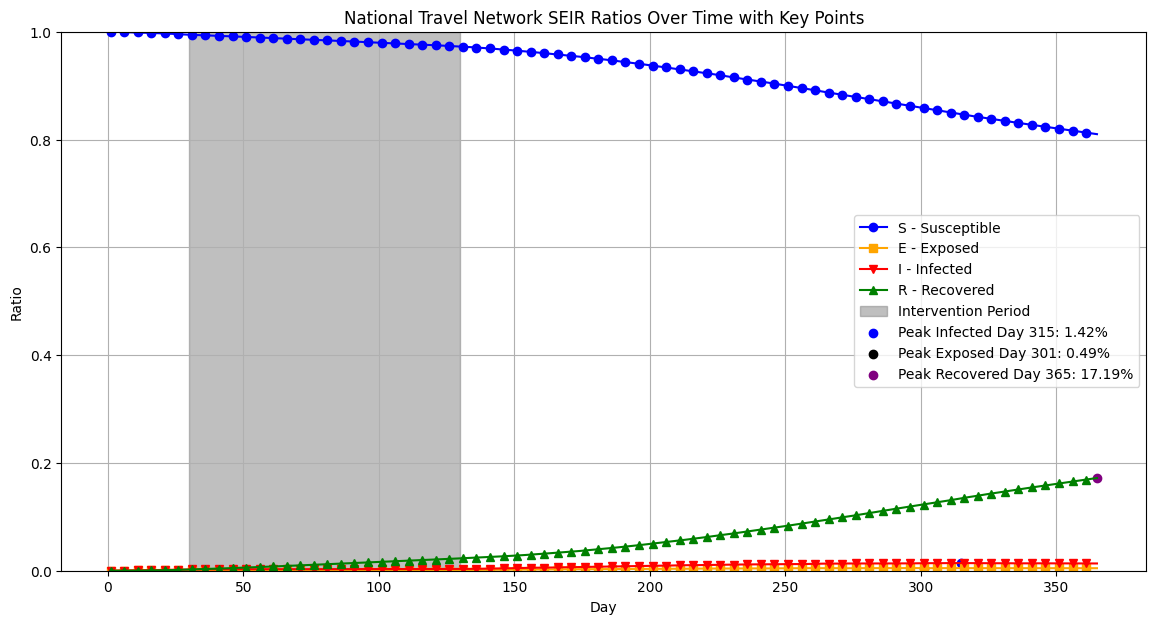

In [43]:
seir_plot(method_start=ls, method_end=le, seir_history=lockdown_outsideworld)

In [44]:
#seir_plot_all_locations(method_start=ls, method_end=le, seir_history=lockdown_outsideworld)

In [45]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day
lockdown_communities = ["Outside World","Bua/Macuata/Cakaudrove", "Cicia", "Kadavu", "Koro", "Lakeba", "LomaivitiOtherIslands", "Lomaloma/Mualevu", "Malolo(Matamanoa Island)", "Malolo(Tadrai/Mana)", "Malolo(Tokoriki Island)", "Malolo(Tropica/Malolo/Likuliku/Castaway)", "Moala", "Nadi", "Naviti", "Naviti(Paradise/MantaRay/Barefoot)", "Ovalau", "Sawakasa", "Serua", "Suva", "Tavuki", "Vuda(Bounty Island)", "Vuda(Lautoka)", "Vuda(Treasure/Beachconber)", "Wainikeli", "Yasawa"] # Lockdown location


lockdownd_all = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

for day in range(1, Tmax + 1):
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)

        community_seir = seir_statement(day,community_seir)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        #print(migration_df)
        community_seir, new_cases = infection(α, β, γ, community_seir)
        lockdownd_all[day] = community_seir


In [46]:
savefile(lockdownd_all,'fj_lockdown_all')

All data saved to fj_lockdown_all.csv


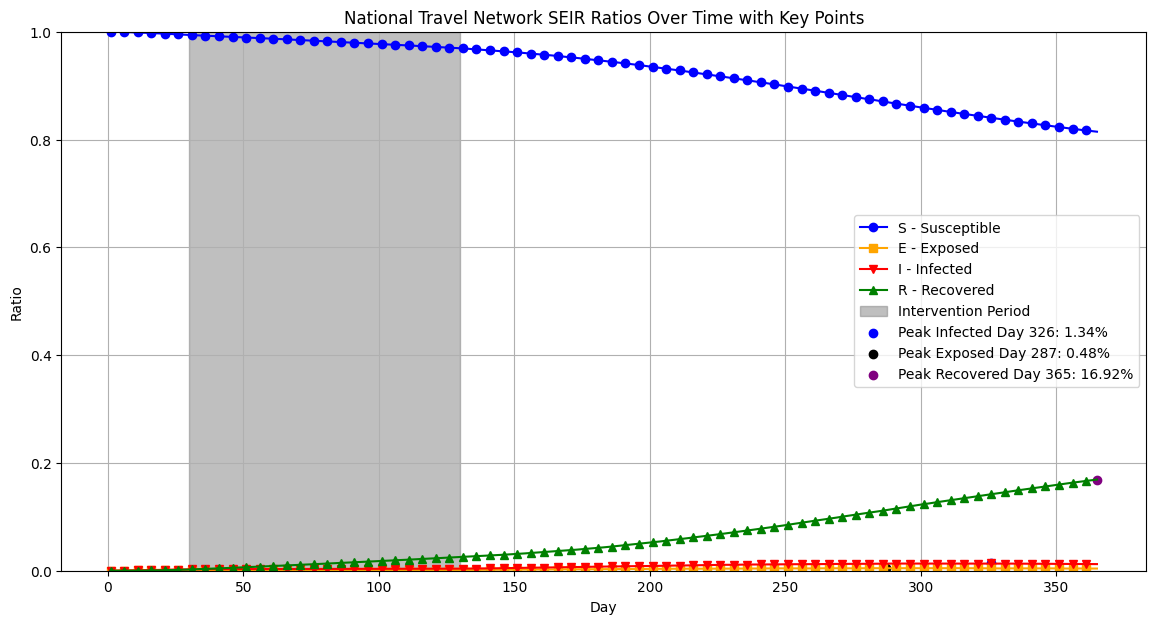

In [47]:
seir_plot(method_start=ls, method_end=le, seir_history=lockdownd_all)

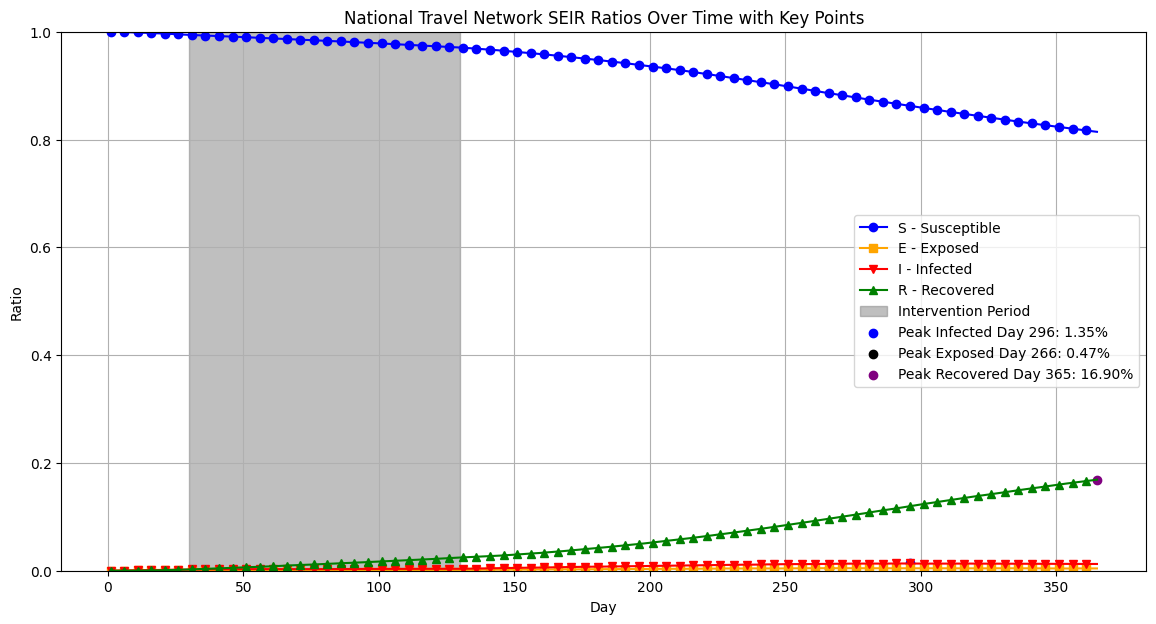

In [48]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day
lockdown_communities = ['Outside World', 'Suva'] # Lockdown location


lockdown_outside_suva = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

for day in range(1, Tmax + 1):
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)

        community_seir = seir_statement(day,community_seir)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        #print(migration_df)
        community_seir, new_cases = infection(α, β, γ, community_seir)
        lockdown_outside_suva[day] = community_seir

seir_plot(method_start=ls, method_end=le, seir_history=lockdown_outside_suva)

In [49]:
savefile(lockdown_outside_suva,'fj_lockdown_outside_suva')

All data saved to fj_lockdown_outside_suva.csv


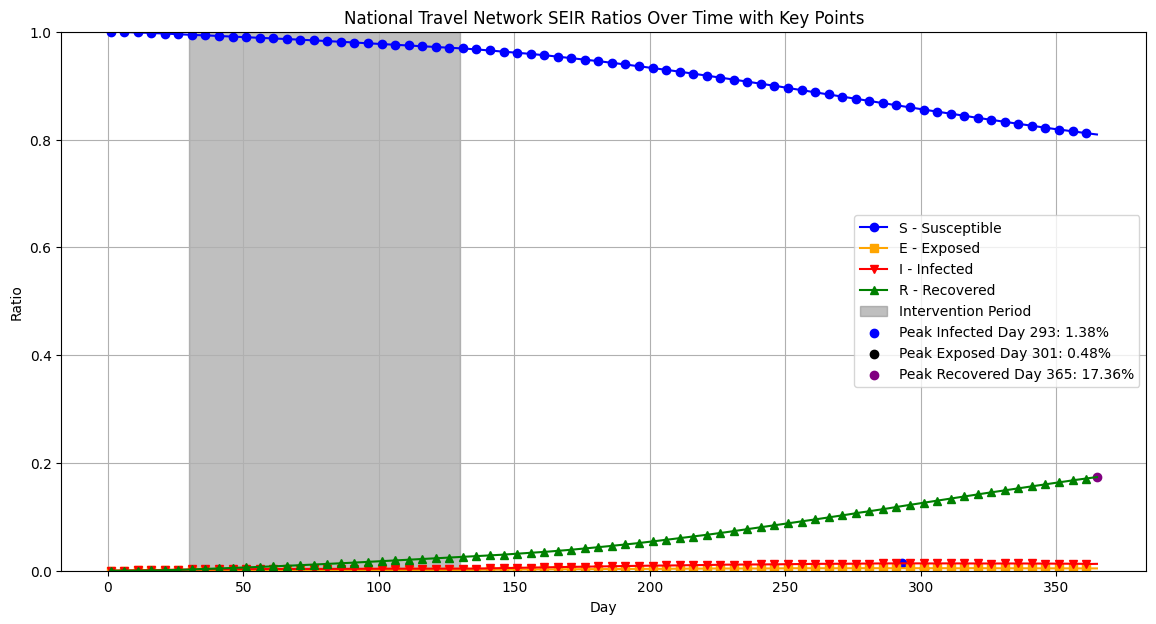

In [50]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day
lockdown_communities = ['Suva','Nadi'] # Lockdown location


lockdownd_suva_nadi = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

for day in range(1, Tmax + 1):
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)

        community_seir = seir_statement(day,community_seir)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        #print(migration_df)
        community_seir, new_cases = infection(α, β, γ, community_seir)
        lockdownd_suva_nadi[day] = community_seir
        
seir_plot(method_start=ls, method_end=le, seir_history=lockdownd_suva_nadi)

In [51]:
savefile(lockdownd_suva_nadi,'fj_lockdownd_suva_nadi')

All data saved to fj_lockdownd_suva_nadi.csv


### 10. Social Distance

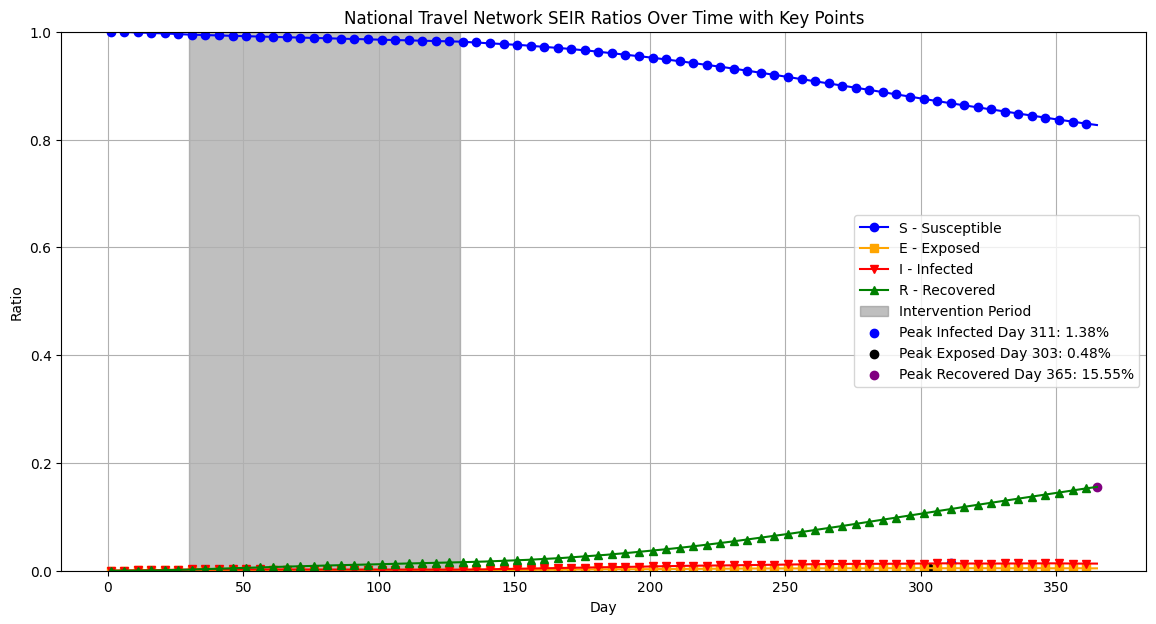

In [54]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ss = 30 # Social distance start day
se = 130 # Social distance end day

social_1m = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ss <= day <= se:
        social_volume = volume_matrix * 0.5
        social_α = α * 0.2 
        community_seir, migration_df = migration(community_seir, binary_matrix, social_volume,inbound)
        community_seir, new_cases = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix,inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    social_1m[day] = community_seir

seir_plot(method_start=ss, method_end=se, seir_history=social_1m)

In [55]:
savefile(social_1m,'fj_social_1m')

All data saved to fj_social_1m.csv


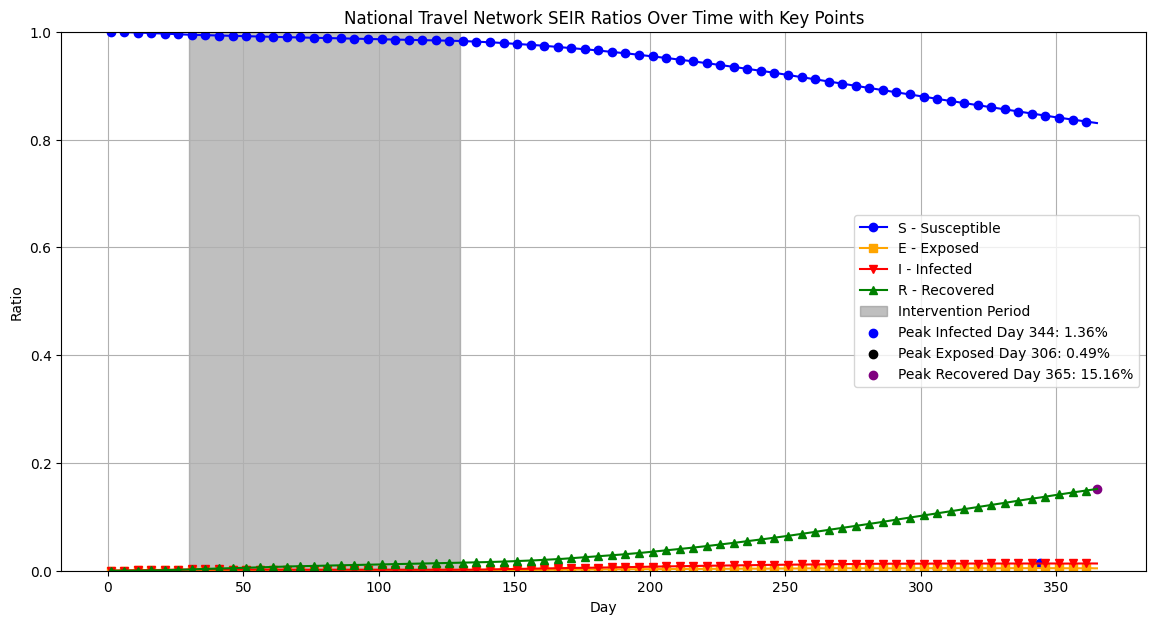

In [56]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ss = 30 # Social distance start day
se = 130 # Social distance end day

social_2m = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ss <= day <= se:
        social_volume = volume_matrix * 0.5
        social_α = α * 0.2 * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, social_volume,inbound)
        community_seir, new_cases = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix,inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    social_2m[day] = community_seir
    
seir_plot(method_start=ss, method_end=se, seir_history=social_2m)

In [57]:
savefile(social_2m,'fj_social_2m')

All data saved to fj_social_2m.csv


In [58]:
#seir_plot_all_locations(method_start=ss, method_end=se, seir_history=social_seir_history)

### 11. Work From Home

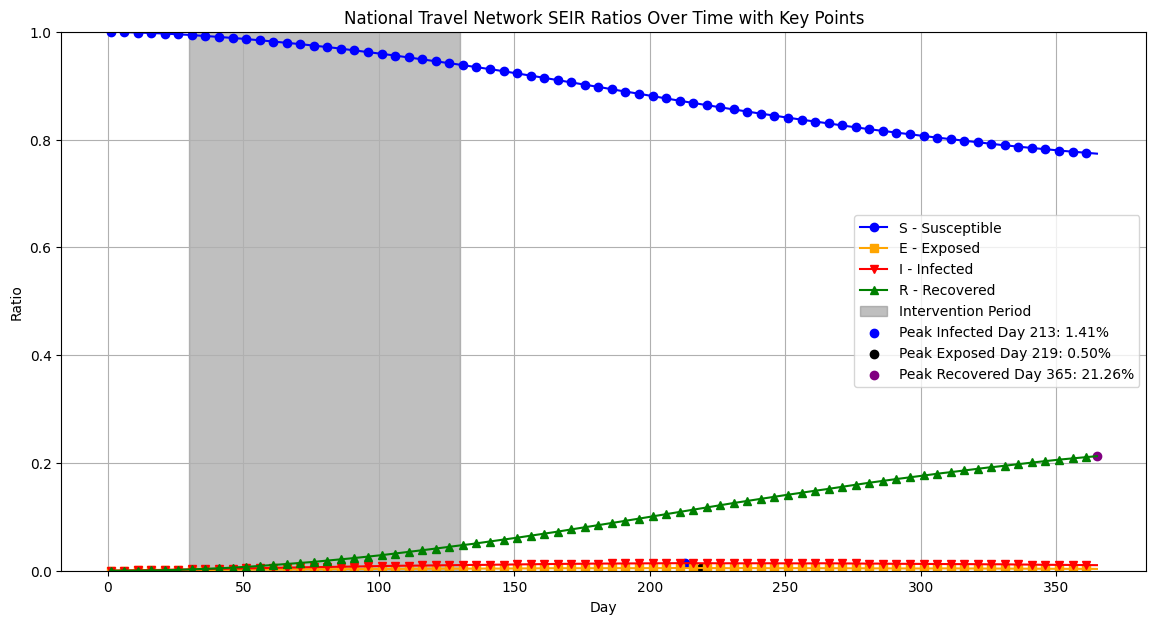

All data saved to fj_wfh_20.csv


In [59]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ws = 30 # Work from home start day
we = 130 # Work from home end day

wfh_20 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.2
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume, inbound)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    wfh_20[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=wfh_20)
savefile(wfh_20,'fj_wfh_20')

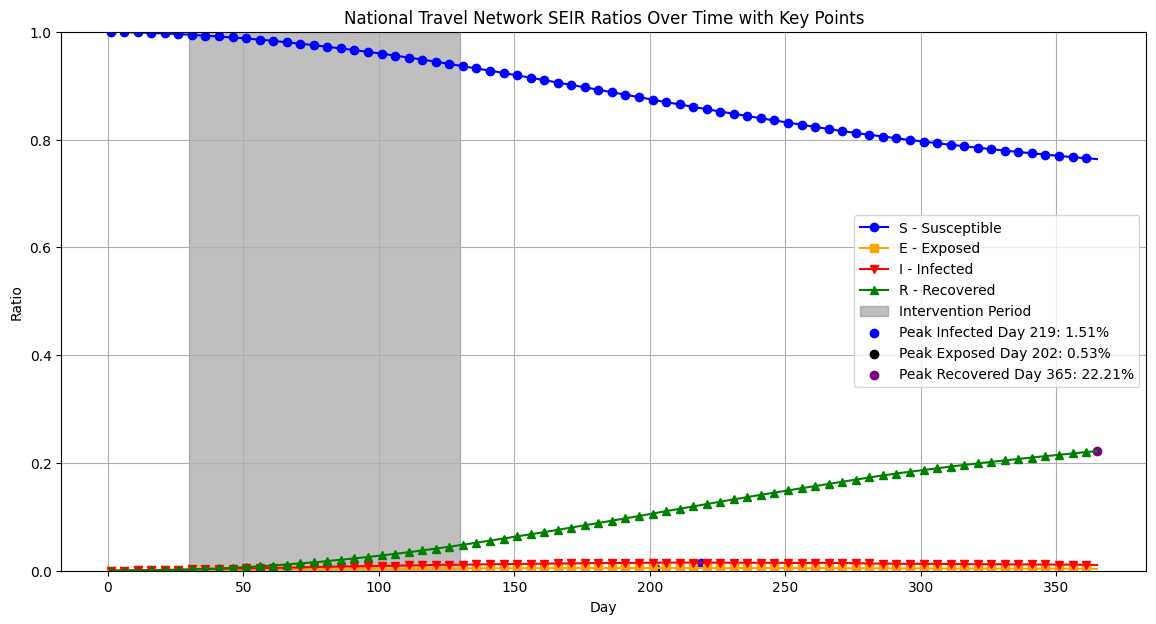

All data saved to fj_wfh_50.csv


In [60]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ws = 30 # Work from home start day
we = 130 # Work from home end day

wfh_50 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.5
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume, inbound)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    wfh_50[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=wfh_50)
savefile(wfh_50,'fj_wfh_50')

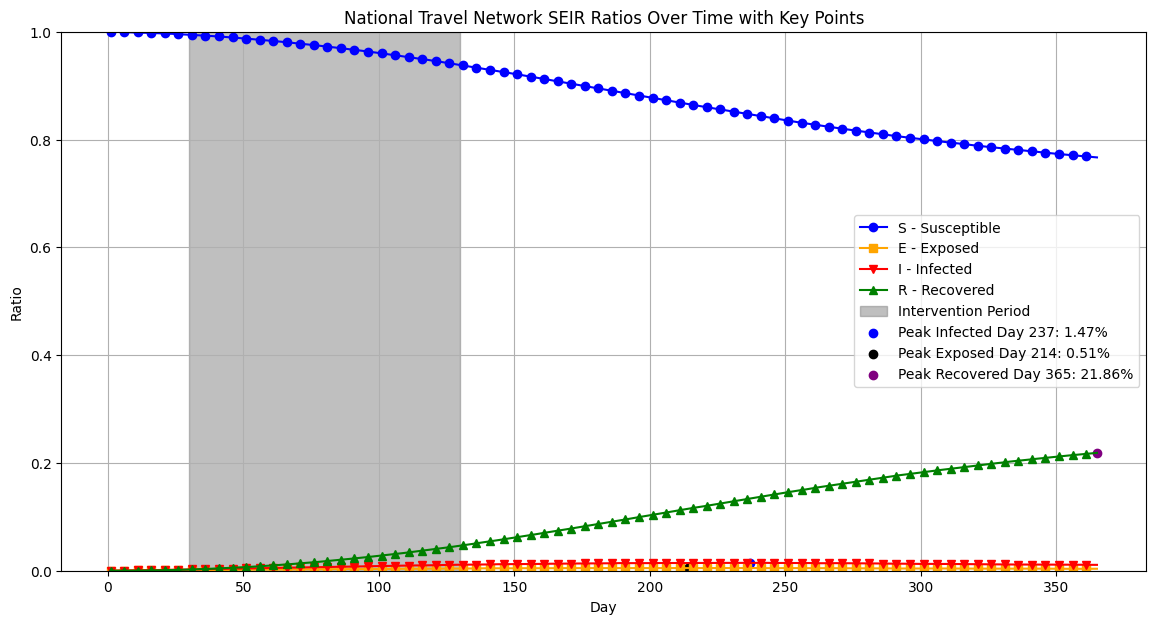

All data saved to fj_wfh_80.csv


In [61]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ws = 30 # Work from home start day
we = 130 # Work from home end day

wfh_80 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.8
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume, inbound)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    wfh_80[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=wfh_80)
savefile(wfh_80,'fj_wfh_80')

In [62]:
#seir_plot_all_locations(method_start=ws, method_end=we, seir_history=work_seir_history)

### 12. Face Mask

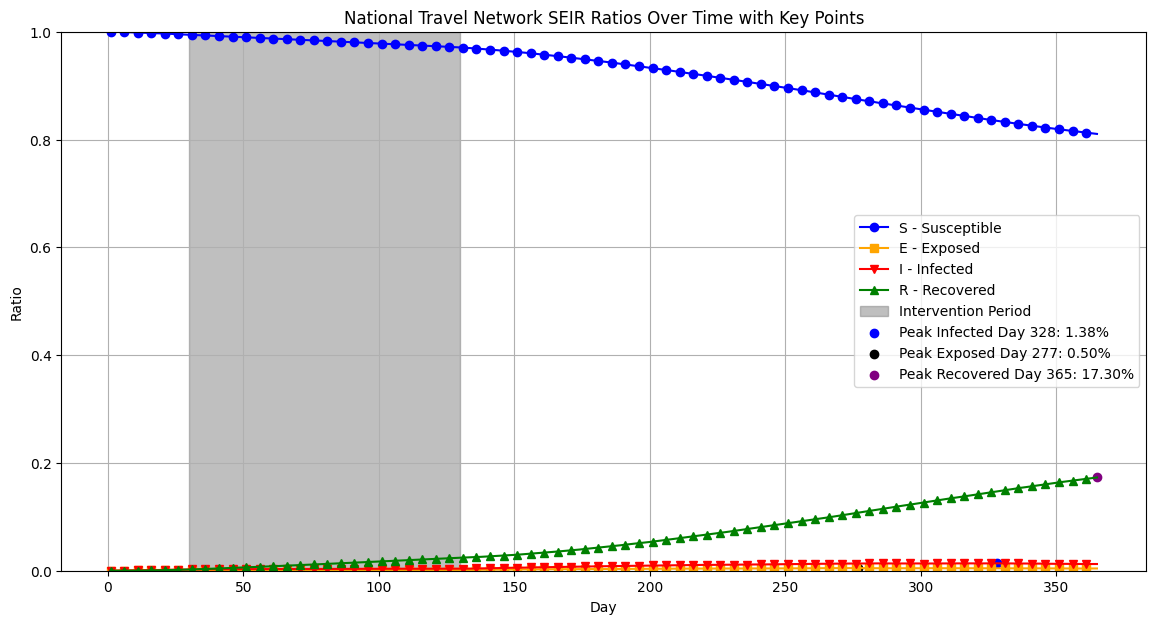

All data saved to fj_mask_cloth.csv


In [63]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ms = 30 # Social distance start day
me = 130 # Social distance end day

mask_cloth = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.44)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    mask_cloth[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_cloth)
savefile(mask_cloth,'fj_mask_cloth')

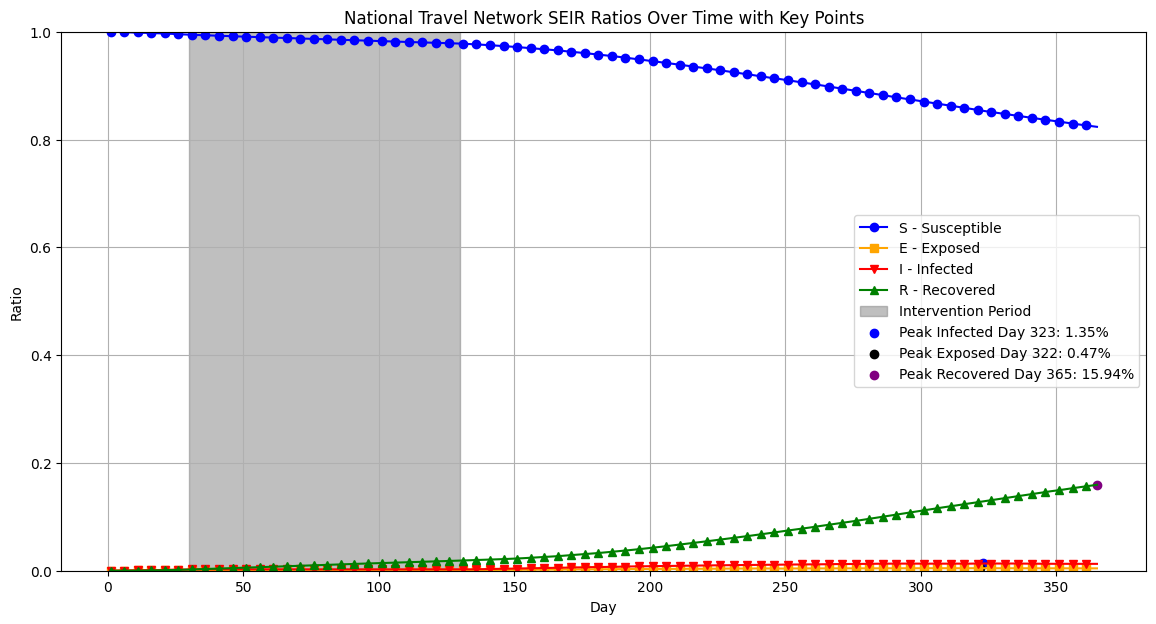

All data saved to fj_mask_surgical.csv


In [65]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ms = 30 # Social distance start day
me = 130 # Social distance end day

mask_surgical = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.66)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    mask_surgical[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_surgical)
savefile(mask_surgical,'fj_mask_surgical')

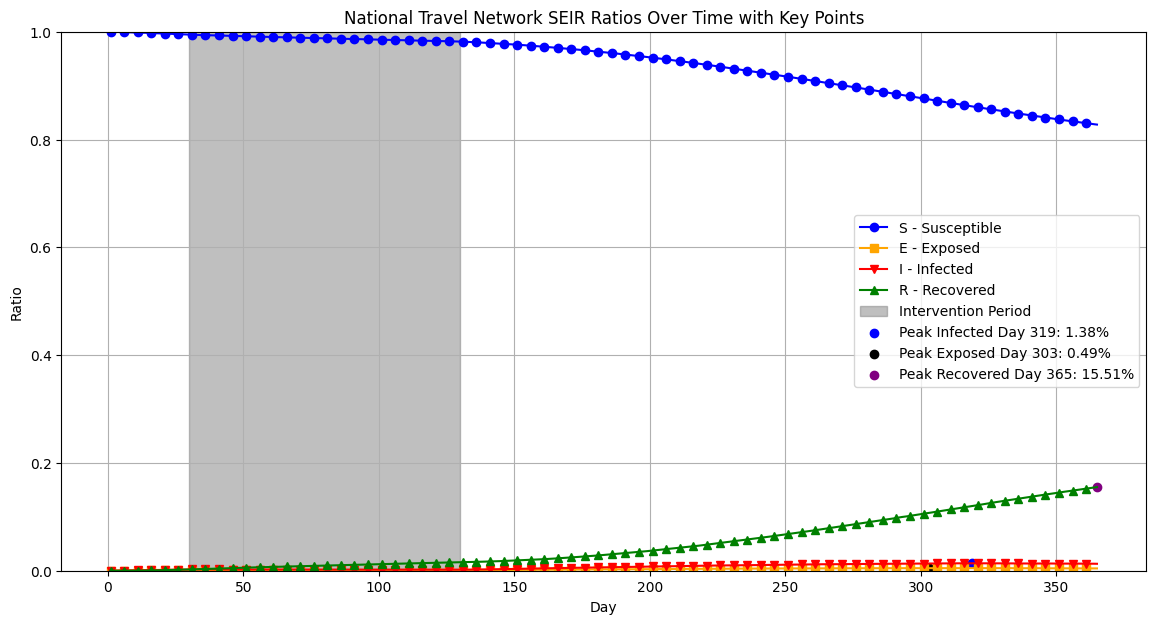

All data saved to fj_mask_N95.csv


In [66]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ms = 30 # Social distance start day
me = 130 # Social distance end day

mask_N95 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.83)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    mask_N95[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_N95)
savefile(mask_N95,'fj_mask_N95')

In [67]:
#seir_plot_all_locations(method_start=ms, method_end=me, seir_history=mask_seir_history)

In [68]:

def vaccine(vaccination_rate, community_seir):
    
    community_seir = community_seir.copy()

    # Initialize SEIR columns
    vaccinated = vaccination_rate * community_seir['S']
    community_seir['S'] = community_seir['S'] - vaccinated
    community_seir['R'] = community_seir['R'] + vaccinated

        
    community_seir.loc['Outside World', 'Population'] = 0
    community_seir.loc['Outside World', 'S'] = 0
    community_seir.loc['Outside World', 'E'] = 0
    community_seir.loc['Outside World', 'I'] = 0
    community_seir.loc['Outside World', 'R'] = 0

    # Calculate the population ratios of S, E, I, and R
    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    

    return community_seir


In [69]:
Tmax = 365

α = 0.077  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

vs = 30 # Social distance start day
ve = 130 # Social distance end day
vaccination_rate = 0.001
vaccine_001rate = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if vs <= day <= ve:
        community_seir = vaccine(vaccination_rate, community_seir)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir, new_cases = infection(α, β, γ, community_seir)
    #print(migration_df)
    vaccine_001rate[day] = community_seir

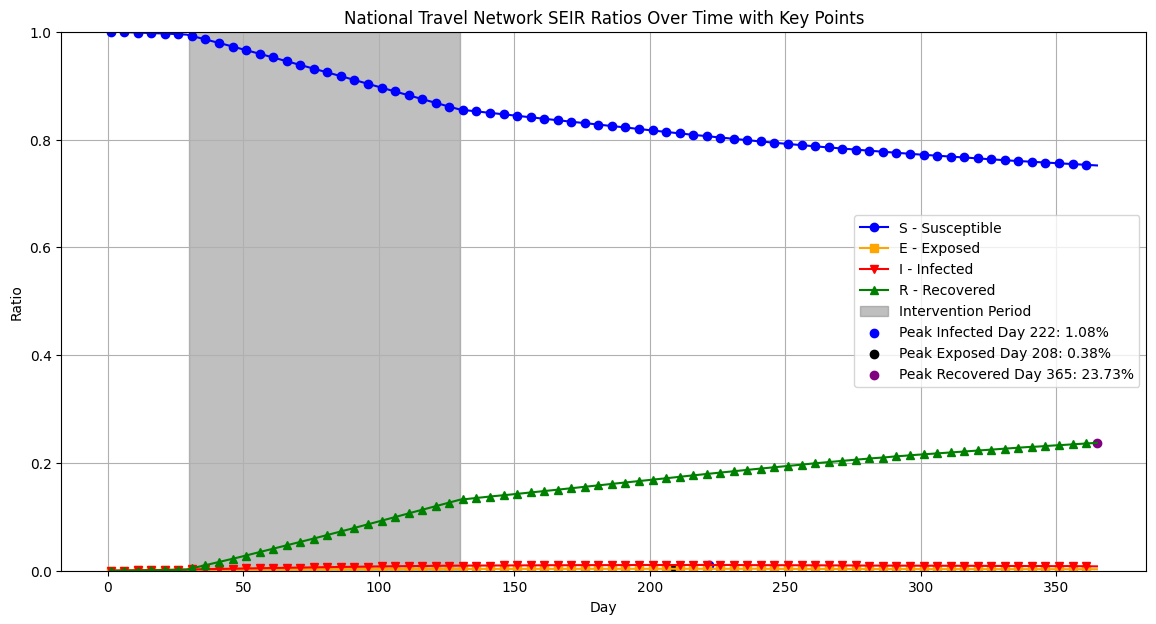

All data saved to fj_vaccine_001rate.csv


In [70]:
seir_plot(method_start=vs, method_end=ve, seir_history=vaccine_001rate)
savefile(vaccine_001rate,'fj_vaccine_001rate')